In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix

In [4]:
def setiap_penyakit(x):
	if(len(x) == 64):
		chunks, chunk_size = len(x), len(x)/16
		chunk_size = int(chunk_size)
		return [x[i:i+chunk_size] for i in range(0, int(chunks), int(chunk_size))]
    
def daftarkan_penyakit(data):
	prediction = list()
	ground_truth = list()
	train = data['target_train']
	for x in train:
		a = setiap_penyakit(x)
		prediction.append({'obesity':a[0], 'diabetes_mellitus':a[1], 'hypercholestrolemia':a[2], 'hypertriglyceridemia':a[3],'hypertension':a[4],'atherosclerotic_cv':a[5],'heart_failure':a[6],'pvd':a[7],'venous_insufficiency':a[8],'osteoarthritis':a[9],'osa':a[10],'asthma':a[11], 'gerd':a[12], 'gallstone':a[13], 'depression':a[14], 'gout':a[15]})

	test = data['correct_target']
	for x in test:
		a = setiap_penyakit(x)
		ground_truth.append({'obesity':a[0], 'diabetes_mellitus':a[1], 'hypercholestrolemia':a[2], 'hypertriglyceridemia':a[3],'hypertension':a[4],'atherosclerotic_cv':a[5],'heart_failure':a[6],'pvd':a[7],'venous_insufficiency':a[8],'osteoarthritis':a[9],'osa':a[10],'asthma':a[11], 'gerd':a[12], 'gallstone':a[13], 'depression':a[14], 'gout':a[15]})		

	return pd.DataFrame(prediction), pd.DataFrame(ground_truth)

def evaluasi_setiap_penyakit(prediction, ground_truth):
	print(confusion_matrix(ground_truth, prediction, labels=['0000', '0001', '0010', '0100', '1000']))

In [36]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues,label=''):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    import itertools
#     if normalize:
#         cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
#         print("Normalized confusion matrix")
#     else:
#         print(label+' Confusion Matrix')

#     print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

def execute_plot_confusion_matrix(ground_truth, prediction, label):
    cnf_matrix = confusion_matrix(ground_truth, prediction, labels=['0000', '0001', '0010', '0100', '1000'])
#     np.set_printoptions(precision=2)

    # Plot non-normalized confusion matrix
    plt.figure()
    plot_confusion_matrix(cnf_matrix, classes=['0000', '0001', '0010', '0100', '1000'],
                      title=label+' Confusion matrix, without normalization', label=label)

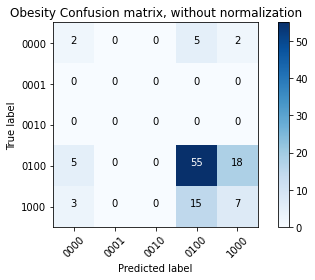

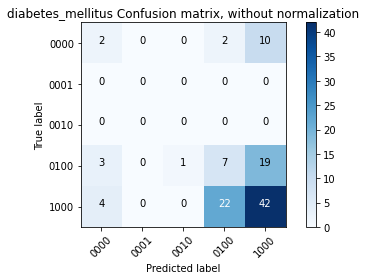

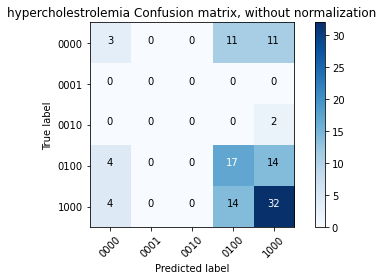

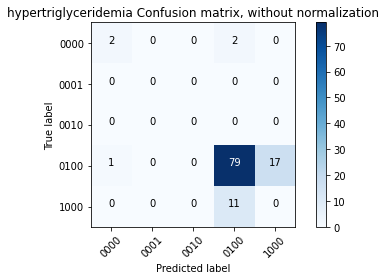

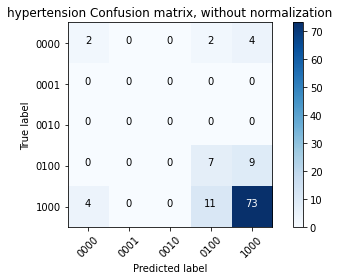

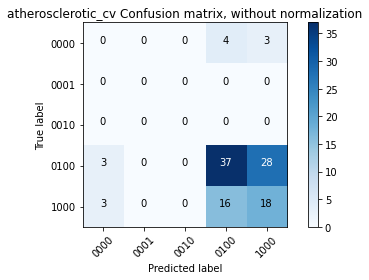

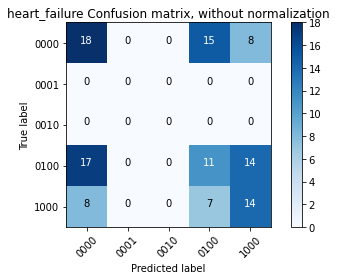

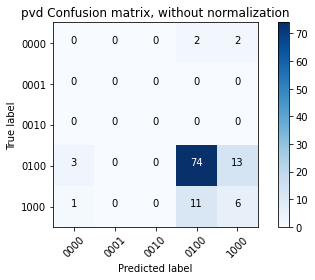

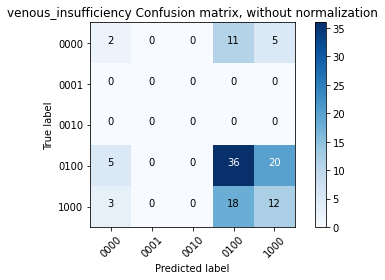

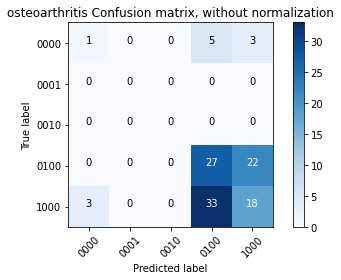

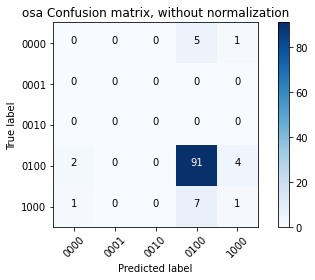

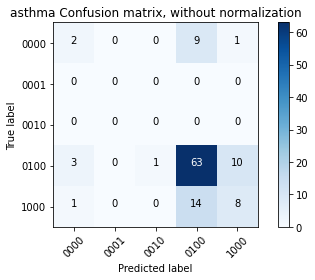

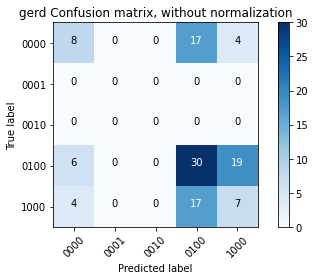

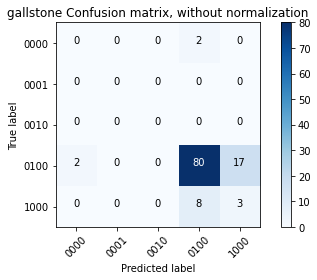

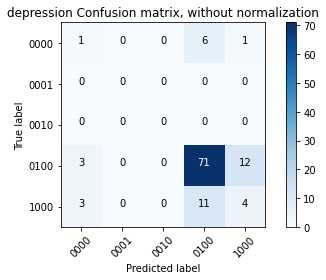

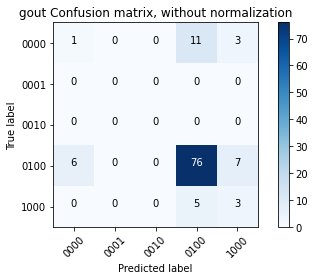

In [37]:
data = pd.read_csv('hasilcosine.csv')
prediction, ground_truth = daftarkan_penyakit(data)
execute_plot_confusion_matrix(ground_truth['obesity'], prediction['obesity'], 'Obesity')
execute_plot_confusion_matrix(ground_truth['diabetes_mellitus'], prediction['diabetes_mellitus'], 'diabetes_mellitus')
execute_plot_confusion_matrix(ground_truth['hypercholestrolemia'], prediction['hypercholestrolemia'], 'hypercholestrolemia')
execute_plot_confusion_matrix(ground_truth['hypertriglyceridemia'], prediction['hypertriglyceridemia'], 'hypertriglyceridemia')
execute_plot_confusion_matrix(ground_truth['hypertension'], prediction['hypertension'], 'hypertension')
execute_plot_confusion_matrix(ground_truth['atherosclerotic_cv'], prediction['atherosclerotic_cv'], 'atherosclerotic_cv')
execute_plot_confusion_matrix(ground_truth['heart_failure'], prediction['heart_failure'], 'heart_failure')
execute_plot_confusion_matrix(ground_truth['pvd'], prediction['pvd'], 'pvd')
execute_plot_confusion_matrix(ground_truth['venous_insufficiency'], prediction['venous_insufficiency'], 'venous_insufficiency')
execute_plot_confusion_matrix(ground_truth['osteoarthritis'], prediction['osteoarthritis'], 'osteoarthritis')
execute_plot_confusion_matrix(ground_truth['osa'], prediction['osa'], 'osa')
execute_plot_confusion_matrix(ground_truth['asthma'], prediction['asthma'], 'asthma')
execute_plot_confusion_matrix(ground_truth['gerd'], prediction['gerd'], 'gerd')
execute_plot_confusion_matrix(ground_truth['gallstone'], prediction['gallstone'], 'gallstone')
execute_plot_confusion_matrix(ground_truth['depression'], prediction['depression'], 'depression')
execute_plot_confusion_matrix(ground_truth['gout'], prediction['gout'], 'gout')